# 1
https://github.com/herzog-ch/stock-prediction-using-kalman-in-python

In [3]:
import numpy as np
import pandas as pd
import requests
import datetime

FPT = 'https://iboard.ssi.com.vn/dchart/api/history?resolution=D&symbol=FPT&from=1615853946&to=1618549686'
data_raw = requests.get(FPT)
data = pd.DataFrame(data_raw.json())
data.head()

,t,o,h,l,c,v,s
0,1615939200,70.15,70.15,68.86,69.55,1603200,ok
1,1616025600,69.72,69.72,68.86,69.72,1807500,ok
2,1616112000,68.86,69.29,68.34,68.68,2247800,ok
3,1616371200,68.43,68.51,67.39,67.74,2084800,ok
4,1616457600,67.56,68.86,67.39,67.82,2201700,ok


In [ ]:
data['t'] = pd.to_datetime(data['t'], unit='s')

In [4]:
import numpy as np
from collections import namedtuple
import matplotlib.pyplot as plt
import pandas as pd
import requests
import datetime

State = namedtuple('State', 'X, P')

def predict(state, F, Q):
  """Perform the predict step
  x_pred = Fx
  P_pred = F P F^T + Q
  
  :param state: State namedtuple
  :param F: Transition matrix
  :param Q: Process Covariance
  :return: The prior as a State namedtuple
  """
  
  assert state.X.shape[0] == F.shape[1]
  assert state.X.shape[1] == 1
  assert F.shape[0] == F.shape[1]
  assert Q.shape[0] == F.shape[1]
  assert Q.shape[0] == F.shape[0]

  x_pred = np.matmul(F, state.X)
  p_pred = np.matmul(F, np.matmul(state.P, F.T)) + Q
  return State(x_pred, p_pred)

def update(prior, z, R, H):
  """ Perform update step

  S = H P_prior H^T + R
  K = P_prior H^T S^-1
  y = z - H x_prior
  x = x_prior + Ky
  P = (I - KH) P_prior

  :param prior: State namedtuple holding the prior mean and covariance
  :param z: measurement vector
  :param R: measurement covariance matrix
  :param H: measurement matrix
  :return: Returns the posterior mean and covariance as State namedtuple
  """

  assert prior.X.shape[1] == 1
  assert prior.X.shape[0] == H.shape[1]
  assert H.shape[0] == z.shape[0]
  assert z.shape[1] == 1
  assert prior.P.shape[0] == prior.P.shape[1]
  assert prior.P.shape[1] == H.shape[1]

  z_pred = np.matmul(H, prior.X)
  y = z - z_pred
  S = np.matmul(H, np.matmul(prior.P, H.T)) + R
  K = np.matmul(prior.P, np.matmul(H.T, np.linalg.inv(S)))
  x_posterior = prior.X + np.matmul(K, y)
  p_posterior = np.matmul((np.identity(prior.P.shape[0]) - np.matmul(K, H)), prior.P)
  return State(x_posterior, p_posterior)

def main():
  # read data
  # data insert here
  FPT = 'https://iboard.ssi.com.vn/dchart/api/history?resolution=D&symbol=FPT&from=1615853946&to=1618549686'
  data_raw = requests.get(FPT)
  dataReader = pd.DataFrame(data_raw.json())
  dataReader['t'] = pd.to_datetime(dataReader['t'], unit='s')

  # init kalman filter
  x = np.full((2, 1), 2)
  P = np.full((2, 2), 2 ** 2)
  state = kalman_filter.State(x, P)

  Q = np.full((2, 2), 1 ** 2)
  F = np.array([[1, 1],
                  [0, 1]])
  R = np.array([[0.5 ** 2]])
  H = np.array([[1, 0]])

  # data for plotting
  gt = {'price': [], 'trend': []}
  result = {'price': [], 'trend': []}
  velocity = []

  counter = 0

  while dataReader.has_more_data():
      z = dataReader.next_measurement()

      if counter == 0:
          x = np.array([[z[0][0]], [0]])
          state = kalman_filter.State(x, P)

      prior = kalman_filter.predict(state, F, Q)
      posterior = kalman_filter.update(prior, z, R, H)
      state = posterior

      gt['price'].append(z[0][0])
      result['price'].append(prior.X[0][0])
      velocity.append(prior.X[1][0])

      if counter == 0:
          gt['trend'].append(1)
          result['trend'].append(1)
      else:
          predicted_trend = 1 if prior.X[0][0] > result['price'][counter - 1] else -1
          result['trend'].append(predicted_trend)
          gt_trend = 1 if z[0][0] > gt['price'][counter - 1] else -1
          gt['trend'].append(gt_trend)

      counter += 1
      # if counter > 20:
      #    break

  # KPI
  # number of correct trend predictions
  correct_predictions = 0
  for x, y in zip(result['trend'], gt['trend']):
      if x == y:
          correct_predictions += 1
  print(correct_predictions)
  print(len(gt['trend']))
  print(float(correct_predictions) / len(gt['trend']))

  plt.figure(1)

  plt.plot(gt['price'])
  plt.plot(result['price'])
  plt.plot(velocity)

  x_axis = list(range(len(gt['trend'])))
  plt.scatter(x_axis, gt['trend'], marker='o', color='g')
  plt.scatter(x_axis, result['trend'], marker='x', color='r')

  plt.legend(['actual stock price', 'predicted stock price', 'actual trend', 'predicted trend', 'momentum'])

  plt.grid()
  plt.show()


if __name__ == '__main__':
    main()

NameError: ignored

# 2

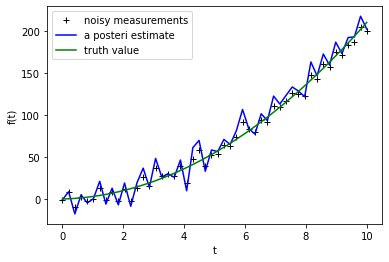

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def main():


        N = 50

        x = np.matrix( '0. 0. 0. 0.' ).T 
        P = np.matrix( np.eye( 4 ) ) * .0001000 # initial uncertainty

        R = 0.1**2


        F = np.matrix( '''
            1. 0. 1. 0.;
            0. 1. 0. 1.;
            0. 0. 1. 0.;
            0. 0. 0. 1.
            ''' )

        H = np.matrix( '''
            1. 0. 0. 0.;
            0. 1. 0. 0.''' )

        motion = np.matrix( '0. 0. 0. 0.' ).T

        Q = np.matrix( np.eye( 4 ) )

        m = np.matrix( '0. 0.' ).T


        sz = (N) # size of array

        true_x = np.linspace( 0.0, 10.0, N )
        true_y = true_x + 2 * true_x**2

        observed_x = true_x
        observed_y = true_y + np.random.normal( 0, 7.5, size=sz )


        kalman_x = np.zeros( N )
        kalman_y = np.zeros( N )

        for n in range( N  ):
            m[0] = observed_x[n]
            m[1] = observed_y[n]
            x, P = kalman( x, P, m, R, motion, Q, F, H )
            kalman_x[n] = x[0]
            kalman_y[n] = x[1]


        plt.figure()
        plt.plot( true_x, observed_y,'k+',label='noisy measurements')
        plt.plot( true_x, kalman_y,'b-',label='a posteri estimate')
        plt.plot( true_x, true_y,color='g',label='truth value')
        plt.legend()
        plt.xlabel('t')
        plt.ylabel('f(t)')

        plt.show()

def kalman( x, P, m, R, motion, Q, F, H ):
        '''
        Parameters:
        x: initial state
        P: initial uncertainty convariance matrix
        measurement: observed position ( same shape as H * x )
        R: measurement noise ( same shape as H )
        motion: external motion added to state vector x
        Q: motion noise ( same shape as P )
        F: next state function: x_prime = F * x
        H: measurement function: position = H * x

        Return: the updated and predicted new values for ( x, P )

        See also http://en.wikipedia.org/wiki/Kalman_filter

        This version of kalman can be applied to many different situations by
        appropriately defining F and H 
        '''

        y = m - H * x

        S = H * P * H.T + R  # residual convariance
        K = P * H.T * S.I    # Kalman gain

        x = x + K * y
        I = np.matrix( np.eye( F.shape[0] ) ) # identity matrix
        P = ( I - K * H ) * P

        x = F * x + motion
        P = F * P * F.T + Q


        return x, P

main()
